In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## I.	Introducción
Desde siempre he sido muy aficionado al fútbol, lo sigo desde que soy niño. Soy socio del Athletic desde hace casi 30 años.

Siempre he tenido esta duda dentro de mí: Qué tan fácil es pronosticar resultados? Podemos obtener grados altos de certidumbre cuándo hablamos de predecir un juego tan aparentemente complicado como el fútbol (donde no hay 2 partidos iguales)?

Es evidente que, sin comernos mucho la cabeza, todos somos conscientes de que hay hitos más probables que otros. La cuestión es… podemos identificar esos patrones? Podemos darle alguna utilidad?


## II.	Dataset
En este caso me he basado en los datos de la liga en curso (Liga Española 2022/2023).

¿Por qué únicamente la Liga española? ¿Por qué no tomar datos de ligas extranjeras: inglesa, italiana, alemana…?
Pienso que cada competición tiene su propia identidad y creo que juntar datos de diferentes competiciones iba a provocar un empobrecimiento de los resultados. Todo es fútbol, pero no todos son iguales. Por ejemplo: A día de hoy el número de expulsados en la Premier League es de 13, mientras que en España alcanza los 126. Me va ayudar en mis predicciones incluir datos tan dispares?

¿Por qué sólo la Liga en curso y no años anteriores?
Por el mismo motivo. Si bien es cierto, que quizá podríamos identificar patrones sostenidos a lo largo del tiempo, creo que la data más sustanciosa es la más próxima.

En este caso cuento con un Dataset de 330 partidos (33 jornadas * 10 partidos) en los que he identificado hasta 113 variables. El Dataset es 100% de creación propia. Muchas de las columnas son estadísticas de los partidos obtenidos en diversas webs, pero la gran mayoría están desarrolladas a partir de ahí.


In [3]:
df=pd.read_csv("completo_34.csv")

En el caso de mi estudio vamos a analizar 4 “target” de un partido de fútbol:
* **Resultado (1-X-2)**

El fútbol es uno de esos deportes en los que no siempre gana uno. El empate es un resultado habitual. Lo cuál hace un poco más difícil la predicción. No se trata sólo de merecer ganar, sino de cuánto lo mereces y si es suficiente para deshacer el empate inicial.
Según los datos con los que cuento, casi la mitad de los partidos se resuelven con victoria local. El resultado menos dado es el empate


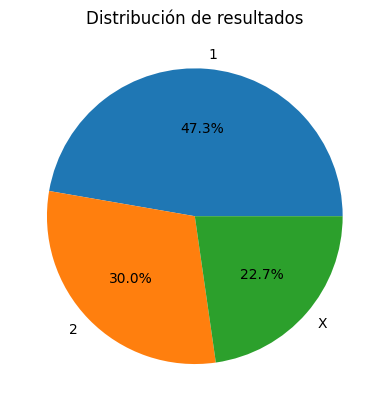

In [5]:
conteo = df['quiniela'].value_counts()
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%')
plt.title('Distribución de resultados')
plt.show()

* **Goles**

Además del signo del resultado, podemos predecir el número de goles que marcará un equipo? Vemos que la distribución de los goles en Casa y Fuera es similar. Si bien la media de goles es de 1,43 y 1,06 respectivamente.


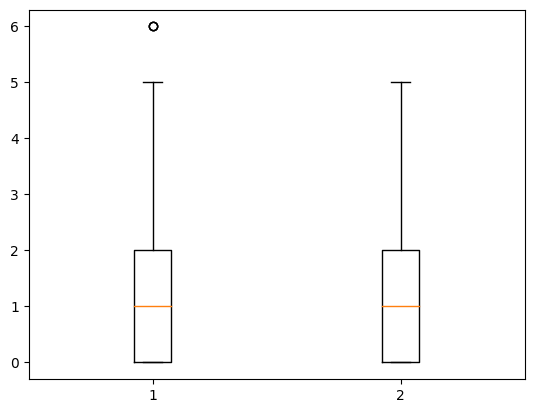

In [9]:
plt.boxplot(df[["Goles_local","Goles_visitante"]]);

<BarContainer object of 2 artists>

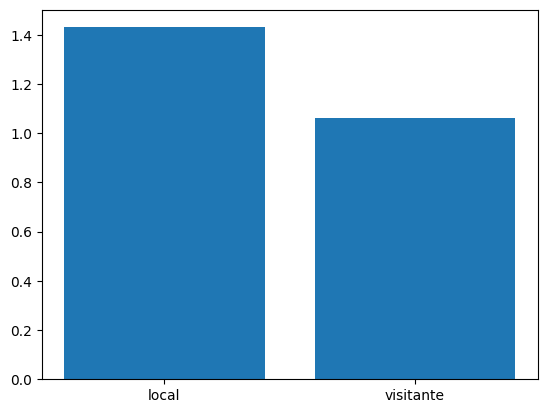

In [6]:
plt.bar(["local","visitante"],[df["Goles_local"].mean(),df["Goles_visitante"].mean()])

* **Tarjetas (amonestaciones)**

Un clásico del fútbol y otros deportes. Podemos intuir que algunos equipos son más propensos a recibir tarjetas que otros. Analizaremos también la influencia del árbitro en cuestión. El Boxplot nos muestra un comportamiento bastante distinto entre las amonestaciones que reciben los equipos cuando actúan de local o visitante.


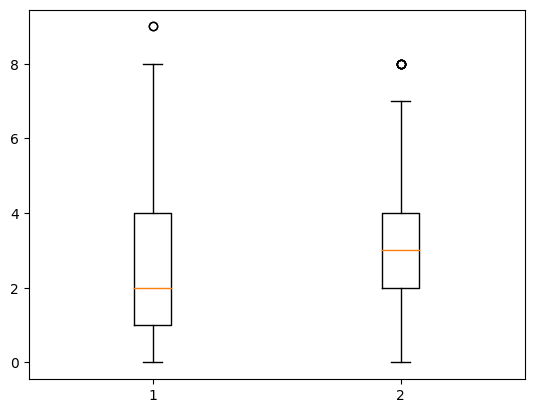

In [14]:
plt.boxplot(df[["tarjetas_total_local","tarjetas_total_visitante"]]);

* **Saques de Esquina**

Si bien no es una de las estadísticas más apasionante cuando analizamos un partido de fútbol, sí me parece una de las más polarizables y que son altamente significativas.


<BarContainer object of 2 artists>

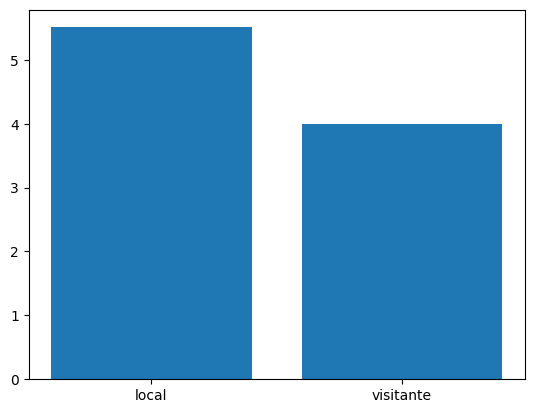

In [18]:
plt.bar(["local","visitante"],[df["Saques_esquina_local"].mean(),df["Saques_esquina_visitante"].mean()])

In [22]:
df.groupby("Equipo_local")["Saques_esquina_local"].sum().sort_values(ascending=False)

Equipo_local
Athletic Club      133
Barcelona          128
Valencia           119
Sevilla            113
Real Madrid        109
Elche              105
Atlético Madrid    103
Rayo Vallecano      94
Villarreal          93
Espanyol            90
Osasuna             83
Valladolid          81
Celta Vigo          81
Cádiz               80
Almería             77
Betis               70
Girona              69
Real Sociedad       65
Getafe              64
Mallorca            61
Name: Saques_esquina_local, dtype: int64

Por otro lado, buscando hacer un estudio más completo. He creado 2 metodologías de predicción:

a)	Predicción en base a las estadísticas del partido. Es decir, le muestro las estadísticas de un partido acabado y quiero que me “acierte” las variables en estudio. Ejemplo: viendo el número de centros al área, despejes, paradas del portero, chuts a gol… me adivine el número de corners que ha habido en el partido.

b)	Predicción antes de disputarse el partido. Tomando en consideración variables conocidas días antes de la disputa del partido, que me prediga el resultado, los goles, las tarjetas y los corners.


## III.	Preprocesamiento de los Datos
Como comentaba anteriormente la base da datos usada en este estudio ha sido creada desde 0. Las estadísticas de base las he tomado de la web https://fbref.com/es/. 
A partir de los datos de cada uno de los partidos he configurado variables nuevas que me resultaban interesantes  de cara a nuestro análisis, como pueden ser: “Media de goles marcados en casa”, “Media de goles recibidos en casa”, “Media de goles marcados fuera”, Media de goles recibidos fuera”… esto es un ejemplo de cómo subdividir una variable en varias en función de lo que queramos estudiar. Para “predecir” los goles que hará un equipo en el próximo partido es tan importante la capacidad goleadora de ese equipo, como la habilidad defensiva del contrario…
Además creé una variable totalmente subjetiva en la que se daba un peso a cada uno de los equipos en función de su clasificación (5 grupos: de más flojos a más fuertes)


In [23]:
df

,Jornada,clas_local,clas_visitante,Equipo_local,Equipo_visitante,Árbitro,G_esp_local,Goles_local,G_esp_visitante,Goles_visitante,...,%_disparos_puerta_recibidos_local,%_disparos_puerta_recibidos_visitante,%_pases_cruzados_hechos_local,%_pases_cruzados_hechos_visitante,%_pases_cruzados_recibidos_local,%_pases_cruzados_recibidos_visitante,tarjetas_cometidas_local,tarjetas_cometidas_visitante,tarjetas_provocadas_local,tarjetas_provocadas_visitante
0,1,3,3,Osasuna,Sevilla,Carlos del Cerro,1.5,2,0.9,1,...,3.750000,4.687500,24.875000,15.687500,12.562500,22.187500,2.687500,3.937500,2.937500,2.875000
1,1,3,2,Celta Vigo,Espanyol,Miguel Ángel Ortiz Arias,0.4,2,1.1,2,...,2.562500,5.352941,20.187500,14.352941,14.250000,23.235294,2.187500,2.941176,3.000000,3.352941
2,1,2,4,Valladolid,Villarreal,Mario Melero,1.0,0,1.5,3,...,3.375000,4.235294,20.375000,12.823529,19.062500,20.588235,1.812500,2.235294,2.062500,2.176471
3,1,5,3,Barcelona,Rayo Vallecano,Alejandro Hernández,1.9,0,0.5,0,...,1.705882,4.062500,23.294118,17.625000,9.588235,20.687500,1.941176,2.875000,3.117647,2.812500
4,1,2,4,Cádiz,Real Sociedad,Isidro Díaz de Mera,0.2,0,1.5,1,...,5.588235,3.235294,20.176471,14.058824,20.117647,16.941176,2.705882,2.294118,2.705882,3.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,33,5,2,Atlético Madrid,Cádiz,César Soto,3.0,5,0.0,1,...,2.000000,4.750000,20.058824,12.250000,14.647059,26.312500,2.470588,3.437500,2.705882,2.812500
326,33,3,3,Girona,Mallorca,Juan Martínez,1.6,2,1.3,1,...,3.529412,4.352941,20.352941,15.705882,18.235294,22.882353,2.411765,3.000000,2.529412,2.235294
327,33,3,2,Sevilla,Espanyol,Alberola Rojas,2.2,3,1.0,2,...,3.705882,5.352941,28.941176,14.352941,13.588235,23.235294,3.470588,2.941176,2.764706,3.352941
328,33,3,2,Rayo Vallecano,Valladolid,Isidro Díaz de Mera,1.3,2,0.6,1,...,3.352941,6.705882,24.882353,14.294118,15.000000,20.882353,2.294118,3.411765,2.588235,1.588235


## IV.	Modelado
Al ser un proyecto de estudio y práctica personal, he decidido probar todos los modelos aprendidos durante las lecciones: Regresión Lineal, Regresión Polinómica, Regularización, Regresión Logística, Árboles de Decisión, Ensembles, KNN y SVM. 
Como se podía intuir desde un principio, el que mejores resultados me ha dado ha sido el Random Forest.


## V.	Predicción y Resultados Finales

1)	Predicción en base a las estadísticas del partido:

a.	**Resultado (1-X-2)**: Acierta el signo del partido un 66% de las veces

b.	**Goles**: El MAE de local y visitante es de 0,43 y 0,37 respectivamente. En una liga con una media de 2,5 goles por partido es un número con el que se puede trabajar aunque es alto.

c.	**Tarjetas**: Se equivoca en 1,36 y 1,58 (local y visitante). Con una media de 5.5 tarjetas por partido... puede servir para orientarnos. Pero no es demasiado fiable

d.	**Saques de esquina**: He usado un clasificador agrupando el número de corners en relaciones cortas (0-2,3-5,6-7…). acierta en un 51% y 57% respectivamente. Teniendo en cuenta que son grupos pequeños no es mala cifra


2)	Predicción Pre-partido:

a.	**Resultado (1-X-2)**: En la j.32 acertó 5 de los 10 resultados. De los 5 que falló, 3 se quedó cerca (viendo la probabilidad) y 2 más lejos
En la j.33 acertó 6 de 10. De los 4 que falló, 3 se quedó cerca y 1 más lejos

b.	**Goles**: Decido hacer un clasificador para que me de probabilidades, no "goles". En 3 partidos de la jornada 33 acertó el resultado exacto. En la mitad de los equipos (10/20) acertó el número de goles exactos.

c.	**Tarjetas**: Las únicas conclusiones positivas que se pueden sacar es que acierta en predecir cuándo un equipo va a tener menos amarillas que su rival (siempre que la diferencia sea grande). En caso contrario, veo que no hay conclusiones a destacar.

d.	**Saques de esquina**: Acierto de 10/20. En los partidos con diferencia amplia, los ha acertado.


## VI.	Conclusiones
Tal y cómo podía imaginar, no hay una bola de cristal ni un Almanaque del futuro que nos vaya a dar la clave para hacernos millonarios con apuestas pre-claras. Pero sí es cierto que es una herramienta más para identificar patrones y ver, con datos, si son ciertas algunas intuiciones que podemos tener.
Obviamente no buscamos un modelo que nos prediga la gran sorpresa de la jornada, sino que nos diga qué es más probable que pase y en qué medida. 
